In [15]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

## Inspect the data

In [7]:
# Read in the data
# Print the first five rows
scores = pd.read_csv('scores.csv')
scores.head()

,score,completed,lesson
0,82.7,35.0,Lesson A
1,65.2,31.0,Lesson A
2,55.3,33.0,Lesson A
3,28.8,25.0,Lesson B
4,31.2,18.0,Lesson B


The data contains three columns:

- **score**: student score on a quiz
- **completed**: the number of other content items on Codecademy that the learner has completed prior to this quiz
- **lesson**: indicates which lesson the learner took directly before the quiz ('Lesson A' or 'Lesson B')

## Model the relationship between quiz score and number of completed content items

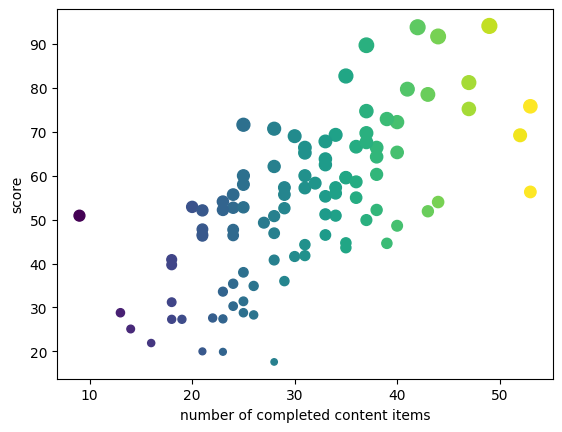

<Figure size 640x480 with 0 Axes>

In [18]:
# Create a scatter plot of score vs completed
plt.scatter(scores['completed'], scores['score'], s=scores['score'] * 1.2, c=scores['completed'], cmap='viridis')
plt.xlabel('number of completed content items')
plt.ylabel('score')
plt.show()
plt.clf()

In [20]:
# Fit a linear regression to predict score based on prior lessons completed
model = sm.OLS.from_formula('score ~ completed', data = scores)
results = model.fit()
results.params

Intercept    13.214113
completed     1.306826
dtype: float64

#### Intercept interpretation:
A student who did not complete any of content items earned 13.21 scores. This is pretty non-sensical because it’s impossible.

#### Slope interpretation:
We expect that completing a 1 additional **content items** are expected to score 1.31 points higher at quiz 

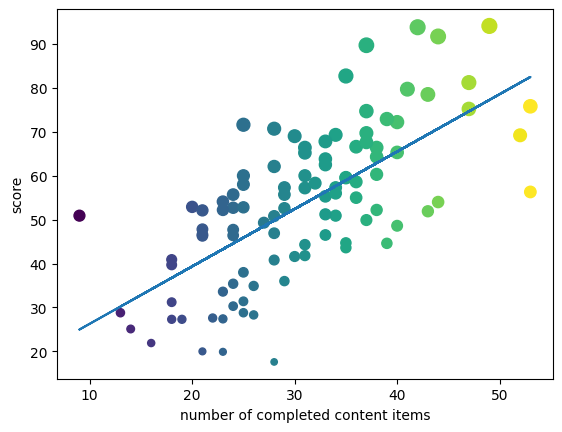

<Figure size 640x480 with 0 Axes>

In [23]:
# Plot the scatter plot with the line on top

# equation for a line
predicted_score = 1.306826 * scores['completed'] + 13.214113

# create the plot with line
plt.scatter(scores['completed'], scores['score'], s=scores['score'] * 1.2, c=scores['completed'], cmap='viridis')
plt.xlabel('number of completed content items')
plt.ylabel('score')
plt.plot(scores['completed'], predicted_score)
plt.show()
plt.clf()

In [29]:
# Predict score for learner who has completed 20 prior lessons
newdata = {'completed':[20]}
np.round(results.predict(newdata)[0], 2)

39.35

In [32]:
# Calculate fitted values
fitted_values = results.predict(scores)
fitted_values.head()

0    58.953009
1    53.725706
2    56.339358
3    45.884753
4    36.736974
dtype: float64